In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("data/credit_risk_dataset.csv")
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
data.shape

(32581, 12)

In [4]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [7]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


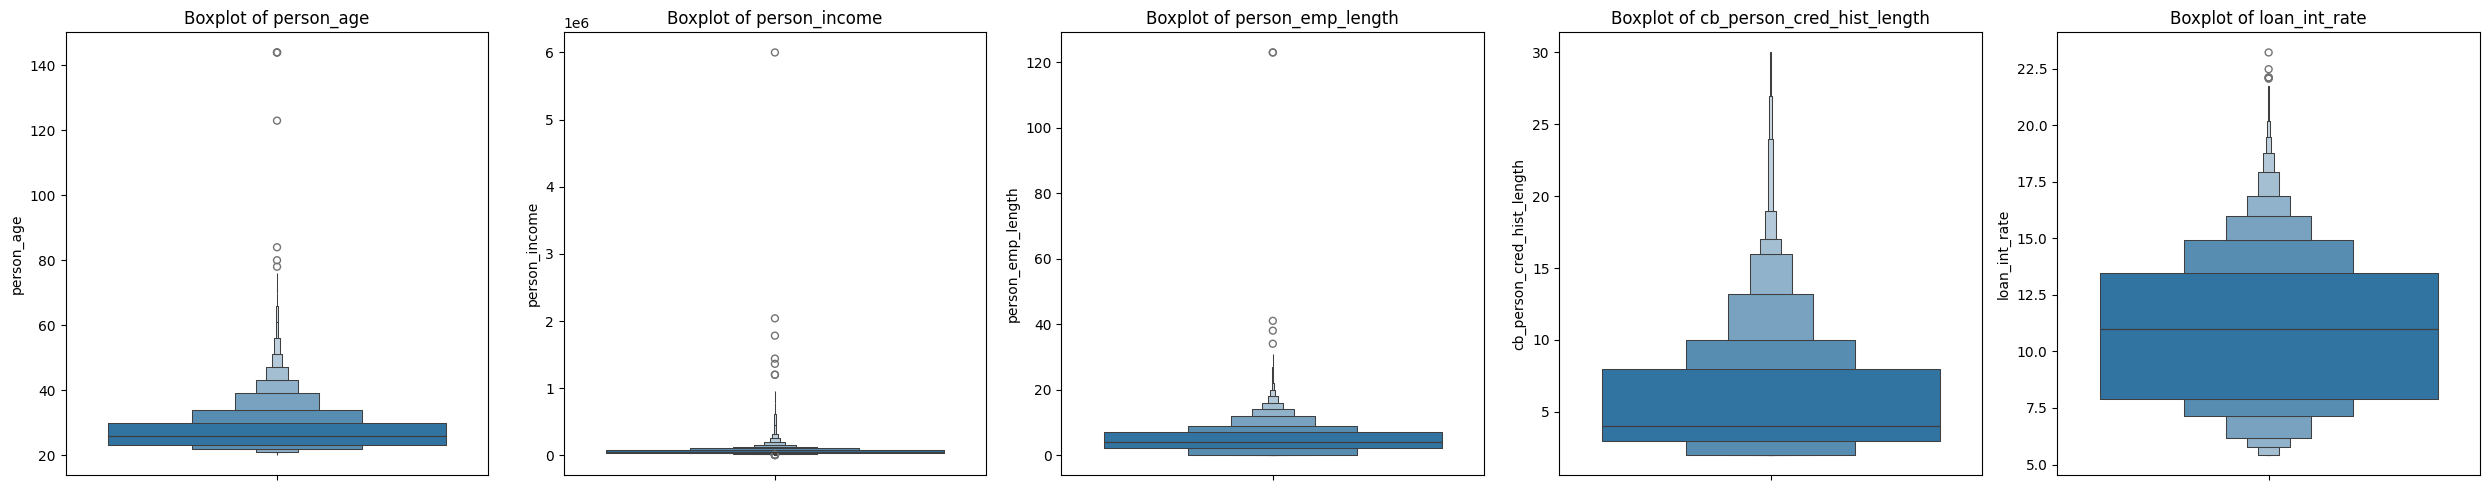

In [8]:
selected_cols = ["person_age", "person_income", "person_emp_length","cb_person_cred_hist_length","loan_int_rate"]

fig,axes = plt.subplots(nrows=1,ncols=len(selected_cols),figsize=(5*len(selected_cols),5))

for i ,col in enumerate(selected_cols):
    sns.boxenplot(data[col],ax = axes[i])
    axes[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [9]:
data["loan_status"].value_counts()

loan_status
0    22435
1     6203
Name: count, dtype: int64

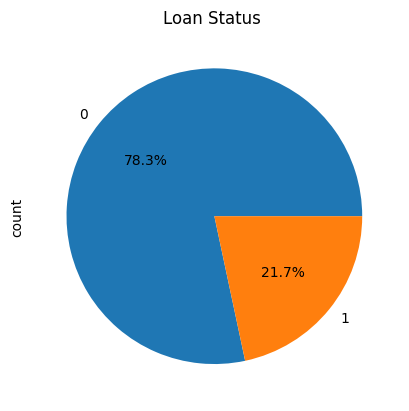

In [10]:

data["loan_status"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.title("Loan Status ")
plt.show()

In [11]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<Axes: xlabel='person_home_ownership', ylabel='count'>

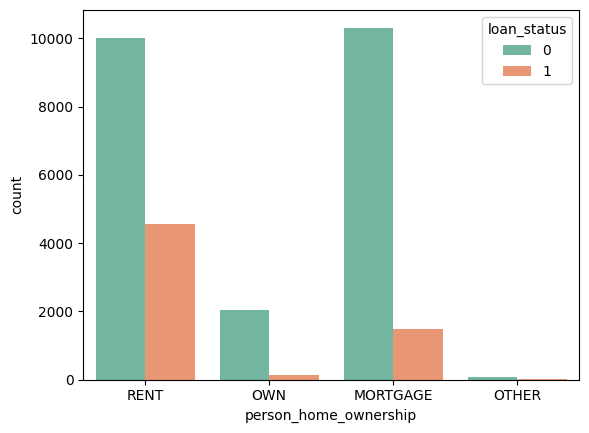

In [12]:
sns.countplot(x="person_home_ownership",data=data,palette="Set2",hue="loan_status")

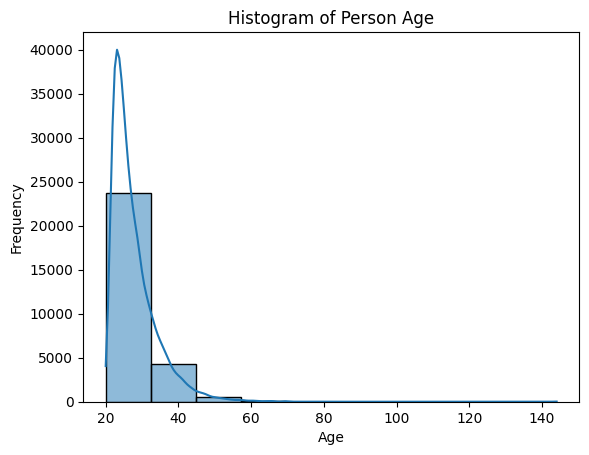

In [13]:
sns.histplot(data["person_age"], bins=10, kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Person Age")
plt.show()

## SMOTE
Synthetic Minority Over-sampling Technique
It works by generating synthetic samples for the minority class rather than just duplicating existing ones.
``How SMOTE Works``
1) For each minority class sample, SMOTE selects k nearest neighbors (usually k=5).
2) It randomly picks one of the neighbors.
3) It generates a new synthetic sample by interpolating between the original and neighbor sample.

New sample = original + random(0,1) × (neighbor − original)

In [14]:
data.shape

(28638, 12)

In [15]:
x=data.drop(columns=["loan_status"])
y = data["loan_status"]

In [16]:
cat_col = x.select_dtypes(include=["object","category"]).columns.tolist()
num_col = x.select_dtypes(include=["number","int64","float64"]).columns.to_list()

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
smote = SMOTE(random_state=42)

## Preprocessing

In [19]:
numeric_col = Pipeline(steps=[
    ("numeric_col_transformation",StandardScaler())
])

categorical_col = Pipeline(steps=[
    ("cat_col_transformation",OneHotEncoder(handle_unknown="ignore"))
])


col_transforemr = ColumnTransformer(transformers=[
    ("numeric",numeric_col,num_col),
    ("cat_col",categorical_col,cat_col)
])


## Random Forest Pipeline 

In [20]:
from imblearn.pipeline import Pipeline
final = Pipeline(
    steps=[
        ("preprocess",col_transforemr),
        ("smote",SMOTE(random_state=42)),
        ("model",RandomForestClassifier(n_estimators=120))
    ]
)

In [21]:
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print("acuracy score is :",accuracy_score(y_pred,y_test))

acuracy score is : 0.9277234636871509


## GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    final,
    param_grid={
    'model__n_estimators': [50, 100,150],
    'model__max_depth': [3, 5,7,10]},
    cv=3, 
    scoring='accuracy', 
    verbose=1
)

grid_search.fit(x_train,y_train)
pred = grid_search.predict(x_test)

print(grid_search.best_params_)
print("accuracy",accuracy_score(pred,y_test))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'model__max_depth': 10, 'model__n_estimators': 100}
accuracy 0.9184706703910615


### Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score,GridSearchCV

score = cross_val_score(final,x_train,y_train,cv=5,scoring='accuracy')
print(score.mean())

0.9275425578350065


## GradientBoostingClassifier

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = Pipeline(
    steps=[
        ("preprocess",col_transforemr),
        ("smote",SMOTE(random_state=42)),
        ("model",GradientBoostingClassifier(n_estimators=50,learning_rate=0.01))
    ]
)

gradient_boosting.fit(x_train,y_train)
y_pred = gradient_boosting.predict(x_test)
print("acuracy score is :",accuracy_score(y_pred,y_test))


acuracy score is : 0.8760474860335196


# Prediction

In [26]:
columns = ["person_age",	"person_income"	,"person_home_ownership"	,"person_emp_length",	"loan_intent"	,"loan_grade"	,"loan_amnt",	"loan_int_rate",	"loan_percent_income"	,"cb_person_default_on_file"	,"cb_person_cred_hist_length"]
user_input = [22,59000,"RENT",123.0,"PERSONAL","D",35000,16.02,0.59,"Y",3]
input = pd.DataFrame([user_input],columns=columns)
prediction = final.predict(input)
if prediction == 1:
    print("Loan Status : Approved")
else:
    print("Loan Status : Not Approved")

Loan Status : Approved


In [31]:
import pickle
import os
os.makedirs("model",exist_ok=True)
with open ("model/random_fores.pkl","wb") as f:
    pickle.dump(final,f)


with open ("model/gadient_boosting.pkl","wb") as f:
    pickle.dump(gradient_boosting,f)
